## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
"""
Your code here
"""

def preproc_x(x, flatten=True):
    x = (x-x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0))
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0801 20:28:39.545556  5252 module_wrapper.py:136] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0801 20:28:41.269943  5252 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1423: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.9242 - acc: 0.3056 - val_loss: 1.7562 - val_acc: 0.3745
Epoch 2/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.7226 - acc: 0.3848 - val_loss: 1.6479 - val_acc: 0.4166
Epoch 3/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.6239 - acc: 0.4190 - val_loss: 1.6110 - val_acc: 0.4269
Epoch 4/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.5571 - acc: 0.4436 - val_loss: 1.5479 - val_acc: 0.4460
Epoch 5/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.5125 - acc: 0.4594 - val_loss: 1.5085 - val_acc: 0.4633
Epoch 6/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.4694 - acc: 0.4765 - val_loss: 1.4760 - val_acc: 0.4752
Epoch 7/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.4351 - acc: 0.4881 - val_loss: 1.

50000/50000 [==============================] - 9s 176us/step - loss: 0.5329 - acc: 0.8100 - val_loss: 2.0886 - val_acc: 0.5053
Epoch 60/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.5282 - acc: 0.8100 - val_loss: 2.0654 - val_acc: 0.5095
Epoch 61/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.5151 - acc: 0.8159 - val_loss: 2.1305 - val_acc: 0.5118
Epoch 62/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.5129 - acc: 0.8143 - val_loss: 2.0996 - val_acc: 0.5086
Epoch 63/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.5019 - acc: 0.8179 - val_loss: 2.1679 - val_acc: 0.5090
Epoch 64/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.4838 - acc: 0.8276 - val_loss: 2.1717 - val_acc: 0.5144
Epoch 65/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.4760 - acc: 0.8305 - val_loss: 2.2605 - val_acc: 0.5066
Epoch 66/100
50000/50000 [=======

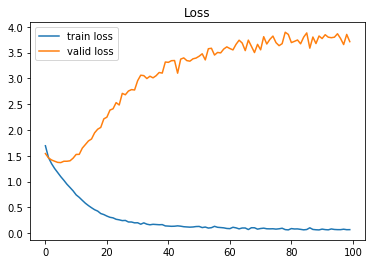

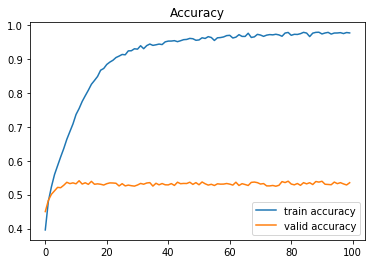

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

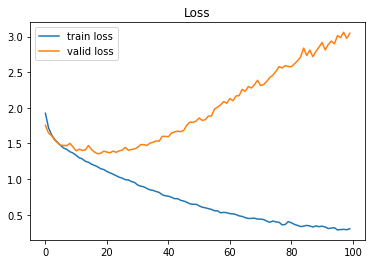

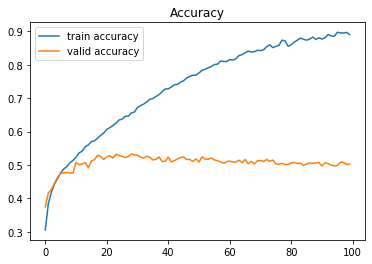

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [17]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.9874 - acc: 0.2741 - val_loss: 1.9048 - val_acc: 0.2998
Epoch 2/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.7747 - acc: 0.3570 - val_loss: 1.7059 - val_acc: 0.3920
Epoch 3/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.6790 - acc: 0.3965 - val_loss: 1.6934 - val_acc: 0.3950
Epoch 4/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.6223 - acc: 0.4192 - val_loss: 1.5752 - val_acc: 0.4345
Epoch 5/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.5652 - acc: 0.4376 - val_loss: 1.5363 - val_acc: 0.4568
Epoch 6/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.5174 - acc: 0.4564 - val_loss: 1.5420 - val_acc: 0.4546
Epoch 7/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.4732 - acc: 0.4754 - val_loss: 1

50000/50000 [==============================] - 8s 155us/step - loss: 0.5770 - acc: 0.7922 - val_loss: 1.9657 - val_acc: 0.5149
Epoch 60/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.5660 - acc: 0.7954 - val_loss: 2.0254 - val_acc: 0.5166
Epoch 61/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.5536 - acc: 0.8028 - val_loss: 2.0129 - val_acc: 0.5153
Epoch 62/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.5633 - acc: 0.7970 - val_loss: 2.0201 - val_acc: 0.5102
Epoch 63/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.5401 - acc: 0.8052 - val_loss: 2.0704 - val_acc: 0.5116
Epoch 64/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.5167 - acc: 0.8158 - val_loss: 2.0931 - val_acc: 0.5079
Epoch 65/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.5045 - acc: 0.8190 - val_loss: 2.1708 - val_acc: 0.5057
Epoch 66/100
50000/50000 [=======

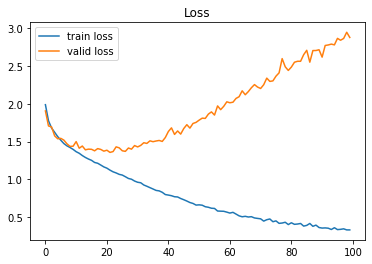

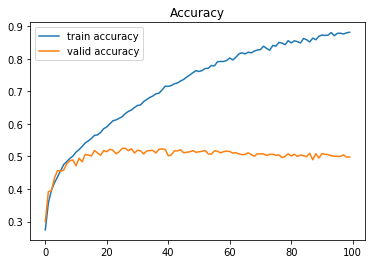

In [21]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()